In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pyecharts.charts import Bar,Pie,Grid,Line
from pyecharts import options as opts
import pyecharts
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not Default','Default']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [3]:
df = pd.read_csv('./MORTGAG07-18_TOTAL_WITH_DEFAULT_SELECTED.csv')
df = df.reindex(sorted(df.columns), axis=1)

In [4]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

In [5]:
def default_rate_viz():
    df.groupby('default')['id'].count()[0],df.groupby('default')['id'].count()[1]
    attr = ['Default','Not Default']
    v1 = [143656,624876]
    over_year = (
        Pie()
        .add('',[list(z) for z in zip(attr, v1)])
        .set_global_opts(title_opts=opts.TitleOpts(title="Overall Default Rate - 16%"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
        )

    return(over_year.render_notebook())

def default_year_viz():
    bar2 = Bar()
    bar2.add_xaxis(['2007-2011','2012-2013','2014','2015','2016','2017','2018'])
    bar2.add_yaxis("Default", [2699,13931,18875,33747,32832,26197,11980])
    bar2.add_yaxis("Not Default", [16260,83081,98171,154021,141486,86020,35647])
    bar2.set_global_opts(title_opts=opts.TitleOpts(title="Default Hist"))
    return(bar2.render_notebook())

def default_loan_viz():
    lst = df.loc[df['default']==1].groupby(['default','grade'])['id'].count().to_list()
    grade = list(np.unique(df['grade']))
    over_grade = (
        Pie()
        .add('',[list(z) for z in zip(grade, lst)])
        .set_global_opts(title_opts=opts.TitleOpts(title="Default Over Loan Grade"))
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )

    return(over_grade.render_notebook())

def default_emp_viz():
    lst = df.loc[df['default']==1].groupby(['default','emp_length'])['id'].count().to_list()
    emp_len = []
    idx = df.loc[df['default']==1].groupby(['default','emp_length'])['id'].count().index
    for i in range(len(idx)):
        emp_len.append(idx[i][1])
    over_emp = (
        Pie()
        .add('',[list(z) for z in zip(emp_len, lst)],radius=[100, 200])
        .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    )

    return(over_emp.render_notebook())

def default_fico_viz():
    fico = df.loc[df['default']==1].groupby('fico_range_low')['id'].count().index.to_list()
    default = df.loc[df['default']==1].groupby('fico_range_low')['id'].count().to_list()
    bar3 = Bar()
    bar3.add_xaxis(fico)
    bar3.add_yaxis("Default", default,color='#5aa0a0',label_opts=opts.LabelOpts(is_show=False))
    #bar3.add_yaxis("Not Default", [16260,83081,98171,154021,141486,86020,35647])
    bar3.set_global_opts(title_opts=opts.TitleOpts(title="Number of Default Below Fico"))
    return(bar3.render_notebook())
def missing_median(df, name):
    med = df[name].median()
    df[name] = df[name].fillna(med)
lst = ['default','dti','loan_amnt',
 'funded_amnt',
 'int_rate',
 'installment',
 'fico_range_low',
 'annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies']
# correlations between all the features
corr = df[lst].corr()

# Progress Presentation - Group 8 

## 1. Overall

**Project Goal**

Use Machine Learning to Build our Credit Model

**Structure**

1.Research on Credit Modeling

(1) Traditional Methods

(2) Statistical Methods (and machine learning methods)

(3) Method Comparison

2.Credit Model Building

2.1 Description of Data

2.2 Predictive Modeling

2.2.1 Descriptive Analysis


2.2.2 Feature Selection and Engineering

2.2.3 Dimension Reduction (optional)

2.2.4 Model Building

•	Logistic Regression

•	KNN

•	Tree based methods (random forest, boosted trees)

•	Support Vector Machine

•	Neural Networks


2.3 Analysis for Credit Models

(1) Parameter Tuning for Model Optimization

(2) Cross Validation for Model Comparison 


**Format**

A Final Research Paper

## 2. Data Preparations


The datasets we use to build credit models contain the information about personal loan data from **Lending Club**.

The whole raw datasets comprise 151 feature variables (including year tag) and have been separated into different files base on the time period. Based on these raw datasets, a further data cleaning process had been undertaken to serve the following purposes:
1.	Aggregate all datasets into one which will be easy to view, store, and transfer
2.	Select only mortgage loan type
3.	Dump non-relevant variables
4.  Create a dependent variable - default which describes whether mortgage has been defaulted by selecting loan type of not current and not paid-in-full; Since we don’t know whether the mortgage is defaulted or not for current loans, we delete those current records.




## 3. Descriptive Analysis


There are in total 768,532 records and 151 variables in our dataset, from year 2007 to 2018.

The first step of our model building process is to select valuable features from the dataset.

In order to do so, we need to have a better understanding of our data.

Thus, we performed descriptive analysis.

### 3.1 Overall Default Rate

The total Default Rate is 16%, which is not super imbalanced

In [6]:
default_rate_viz()

### 3.2 Default Over The Years

As we can see, most loans happened in year 2015

In [7]:
default_year_viz()

### 3.3  Default Over Loan Grade

Apparently, most default happens when the loan is graded as C

The percentage of lower grade is very small.

It might be the reason that when loan is graded too low, then the mortage won't be granted 

In [8]:
default_loan_viz()

### 3.4 Default Over The Employeement Length

Surprisingly, most of the default happened on individuals who are employeed over 10 years.

We think the reason might because those individuals who are more often unemployeed won't be granted to mortgage as much, and they even might not want to apply for the mortgage in the first place

In [9]:
default_emp_viz()

### 3.5  Number of Default Below Fico Range

As it shows, there are 15,038 defaulted case below fico score of 660,

as fico score range goes up, the number of default goes down.

And there are very few default cases when fico score is way below 660, which means that most of such individuals will not be granted with mortgage loan.

In [10]:
default_fico_viz()

## 4. Feature Selection 

From descriptive analysis and other research, we selected 23 features that could be potentially helpful and excluded those features that may cause target lease problem.

Out of the 23 features, there are 10 numerical ones and 13 categorical ones.


### 4.1 Numerical Features

#### 4.1.1 Layout

<img src="./nu.png">

#### 4.1.2 Correlation Map

Below is the correlation map of numeric variables we selected.

Some variables are highly correlated (ie. funded_amnt and installment), but it will not affect the overall prediction results.

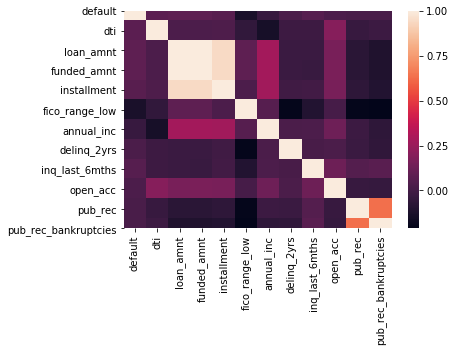

In [10]:
sns.heatmap(corr)

### 4.2 Categorical Features Layout
Below are the categorical variables we selected. We are still working on a better way to put them into our models.


<img src="./cate.png">

## 5. Model Building

Now we are going to build basic machine learning models to fit the data.

As for the missing values, we have convert them in the specified column to the median.

In [11]:
df_numeric = df[lst].drop(columns='default')
missing_median(df_numeric,'inq_last_6mths')
missing_median(df_numeric,'delinq_2yrs')
missing_median(df_numeric,'open_acc')
missing_median(df_numeric,'pub_rec')
missing_median(df_numeric,'pub_rec_bankruptcies')
missing_median(df_numeric,'dti')
df_numeric['int_rate'] = df_numeric['int_rate'].apply(lambda x:float(x.strip('%').strip(' ')) )
y = df['default'].values
X = df_numeric.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 5.1 Model Visualization Using Descision Tree

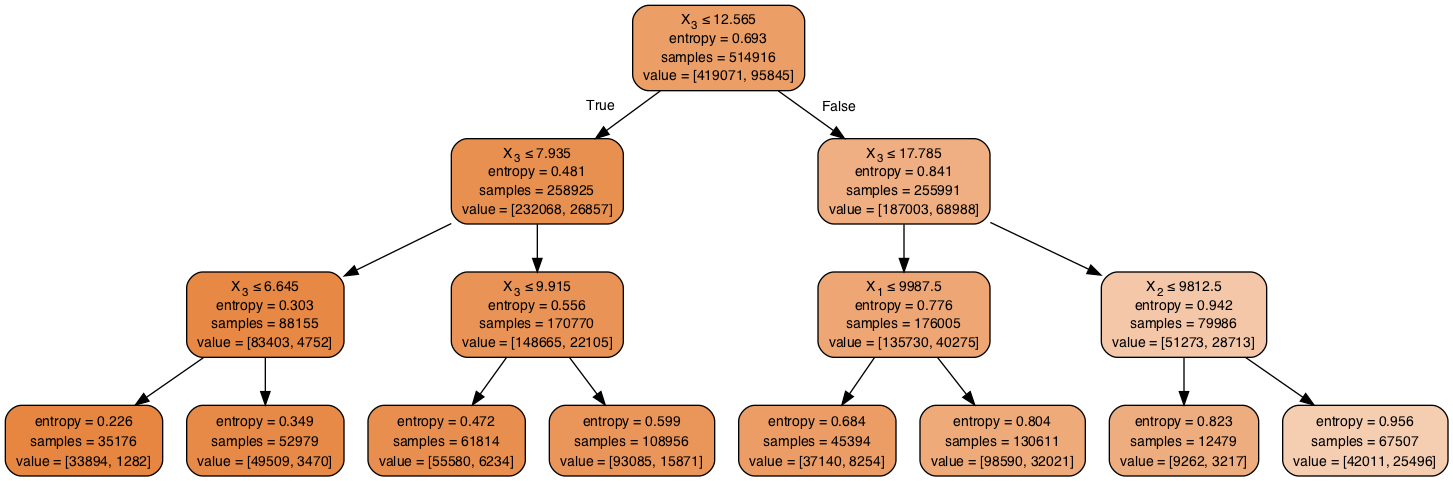

In [14]:
dtree=DecisionTreeClassifier(max_depth=3,criterion='entropy')
dtree.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 5.2 Logistic Regression VS KNN VS Random Forest

Logistic Regression
Accuracy is: 0.812
precision is: 0.523
recall is: 0.025


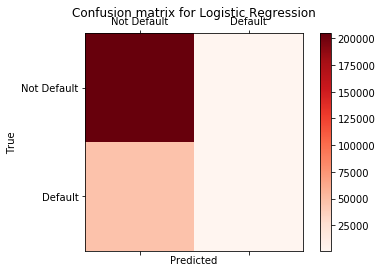

KNN
Accuracy is: 0.785
precision is: 0.302
recall is: 0.108


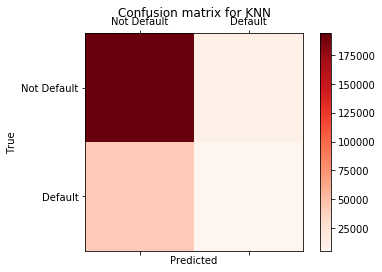

Random Forest
Accuracy is: 0.801
precision is: 0.372
recall is: 0.083


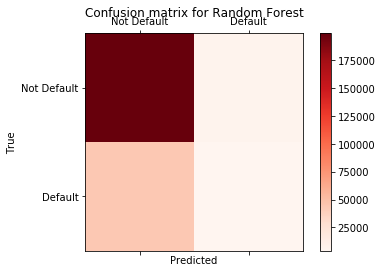

In [13]:
%matplotlib inline
classifier_logistic.fit(X_train, y_train)
pred_log = classifier_logistic.predict(X_test)

classifier_KNN.fit(X_train, y_train)
pred_knn = classifier_KNN.predict(X_test)

classifier_RF.fit(X_train, y_train)
pred_rf = classifier_RF.predict(X_test)

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,pred_log)),
    ("KNN", confusion_matrix(y_test,pred_knn)),
    ("Random Forest", confusion_matrix(y_test,pred_rf)),
]
#confusion_matrices
draw_confusion_matrices(confusion_matrices)

It turns out that logistic regression and random forest have almost the same predictability in this simple run.

## 6. Next Steps

### 6.1 Deal With Categorical Variables
We are working on a better way to put categorical variables into our models.
### 6.2 Further Model Optimization
#### 6.2.1 Feature Engineering
We have replaced the missing value with median value, however there might be better ways such as 
Lagrangian interpolation.

Moreover normalization and standardization methods can be applied.
#### 6.2.2 Parameter Optimization
We will do cross-validation to optimize parameters when building models.
#### 6.2.3 Ensemble Learning
We will see if better performance can be achieved by integrating models together.

### 6.3 Plan Map

<img src="./plan.png">

# 7. Encode Categorical

- ###  One hot encoding

In [15]:
np.unique(df['addr_state'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [45]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [46]:
encode_text_dummy(df, 'addr_state')

In [47]:
np.unique(df['initial_list_status'])

array(['f', 'w'], dtype=object)

In [48]:
encode_text_dummy(df, 'initial_list_status')

In [49]:
np.unique(df['verification_status'])

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [50]:
encode_text_dummy(df, 'verification_status')

In [52]:
ID = df['id']

In [55]:
df.head()

,Unnamed: 0,all_util,annual_inc,default,delinq_2yrs,desc,dti,earliest_cr_line,emp_length,emp_title,fico_range_low,funded_amnt,grade,home_ownership,id,inq_last_6mths,installment,int_rate,last_pymnt_d,loan_amnt,loan_status,open_acc,out_prncp,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,total_pymnt,total_rec_prncp,year,zip_code,addr_state-AK,addr_state-AL,addr_state-AR,addr_state-AZ,addr_state-CA,addr_state-CO,addr_state-CT,addr_state-DC,addr_state-DE,addr_state-FL,addr_state-GA,addr_state-HI,addr_state-IA,addr_state-ID,addr_state-IL,addr_state-IN,addr_state-KS,addr_state-KY,addr_state-LA,addr_state-MA,addr_state-MD,addr_state-ME,addr_state-MI,addr_state-MN,addr_state-MO,addr_state-MS,addr_state-MT,addr_state-NC,addr_state-ND,addr_state-NE,addr_state-NH,addr_state-NJ,addr_state-NM,addr_state-NV,addr_state-NY,addr_state-OH,addr_state-OK,addr_state-OR,addr_state-PA,addr_state-RI,addr_state-SC,addr_state-SD,addr_state-TN,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w,verification_status-Not Verified,verification_status-Source Verified,verification_status-Verified
0,0,NaN,58000.0,1,0.0,NaN,14.92,Sep-1989,8.0,Truck Driver Delivery Personel,710.0,10400.0,1,MORTGAGE,36805548,2.0,321.08,6.99%,Aug-2016,10400.0,Charged Off,17.0,0.0,0.0,0.0,credit_card,6133.0,31.6%,A3,36 months,Credit card refinancing,36.0,6611.690000,5217.75,2014,937xx,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,2,NaN,75000.0,0,0.0,NaN,23.63,Jan-2001,10.0,Deputy sheriff,675.0,17000.0,3,MORTGAGE,37682226,0.0,578.22,13.66%,May-2016,17000.0,Fully Paid,7.0,0.0,0.0,0.0,debt_consolidation,5063.0,46.4%,C3,36 months,Debt consolidation,31.0,19562.310001,17000.00,2014,144xx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,4,NaN,89000.0,0,0.0,NaN,13.77,Oct-2001,0.0,Manufacturing Engineer,685.0,2500.0,2,MORTGAGE,37741884,1.0,83.03,11.99%,Jun-2015,2500.0,Fully Paid,9.0,0.0,0.0,0.0,home_improvement,22908.0,94.3%,B5,36 months,Home improvement,32.0,2622.220000,2500.00,2014,554xx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,5,NaN,120000.0,0,3.0,NaN,6.87,Jul-1989,10.0,Assistant manager,660.0,6000.0,2,MORTGAGE,37742129,0.0,194.99,10.49%,Apr-2017,6000.0,Fully Paid,11.0,0.0,0.0,0.0,home_improvement,49626.0,82.6%,B3,36 months,Home improvement,48.0,6839.302523,6000.00,2014,403xx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,7,NaN,108000.0,1,0.0,NaN,23.37,Mar-2003,10.0,construction foreman,680.0,18450.0,3,MORTGAGE,37822030,3.0,633.36,14.31%,Feb-2016,18450.0,Charged Off,11.0,0.0,0.0,0.0,home_improvement,5925.0,87%,C4,36 months,Home improvement,20.0,9387.620000,5481.70,2014,810xx,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


- ### Ordinary encode

In [26]:
df.groupby('emp_length')['addr_state'].count()

emp_length
1 year        37772
10+ years    309180
2 years       55765
3 years       52510
4 years       41438
5 years       44940
6 years       35518
7 years       34301
8 years       35999
9 years       31168
< 1 year      46665
Name: addr_state, dtype: int64

In [35]:
df['emp_length'] = df['emp_length'].map({'< 1 year':0, '1 year':1, '2 years': 2,'3 years': 3,'4 years': 4,'5 years': 5,'6 years': 6,'7 years': 7,'8 years': 8,
'9 years': 9,'10+ years': 10})

In [36]:
df.groupby('grade')['addr_state'].count()

grade
A    156721
B    225800
C    210224
D    105856
E     49156
F     16066
G      4709
Name: addr_state, dtype: int64

In [37]:
df['grade'] = df['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

- ### Select valid variables

In [60]:
df_x = df.drop(columns=['Unnamed: 0', 'all_util', 'desc', 'earliest_cr_line', 'emp_title', 'home_ownership', \
                 'id','loan_status', 'purpose', 'term','sub_grade', 'title', 'year', 'zip_code','last_pymnt_d'])

In [61]:
df_x.head()

,annual_inc,default,delinq_2yrs,dti,emp_length,fico_range_low,funded_amnt,grade,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,out_prncp,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state-AK,addr_state-AL,addr_state-AR,addr_state-AZ,addr_state-CA,addr_state-CO,addr_state-CT,addr_state-DC,addr_state-DE,addr_state-FL,addr_state-GA,addr_state-HI,addr_state-IA,addr_state-ID,addr_state-IL,addr_state-IN,addr_state-KS,addr_state-KY,addr_state-LA,addr_state-MA,addr_state-MD,addr_state-ME,addr_state-MI,addr_state-MN,addr_state-MO,addr_state-MS,addr_state-MT,addr_state-NC,addr_state-ND,addr_state-NE,addr_state-NH,addr_state-NJ,addr_state-NM,addr_state-NV,addr_state-NY,addr_state-OH,addr_state-OK,addr_state-OR,addr_state-PA,addr_state-RI,addr_state-SC,addr_state-SD,addr_state-TN,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w,verification_status-Not Verified,verification_status-Source Verified,verification_status-Verified
0,58000.0,1,0.0,14.92,8.0,710.0,10400.0,1,2.0,321.08,6.99%,10400.0,17.0,0.0,0.0,0.0,6133.0,31.6%,36.0,6611.690000,5217.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,75000.0,0,0.0,23.63,10.0,675.0,17000.0,3,0.0,578.22,13.66%,17000.0,7.0,0.0,0.0,0.0,5063.0,46.4%,31.0,19562.310001,17000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,89000.0,0,0.0,13.77,0.0,685.0,2500.0,2,1.0,83.03,11.99%,2500.0,9.0,0.0,0.0,0.0,22908.0,94.3%,32.0,2622.220000,2500.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,120000.0,0,3.0,6.87,10.0,660.0,6000.0,2,0.0,194.99,10.49%,6000.0,11.0,0.0,0.0,0.0,49626.0,82.6%,48.0,6839.302523,6000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,108000.0,1,0.0,23.37,10.0,680.0,18450.0,3,3.0,633.36,14.31%,18450.0,11.0,0.0,0.0,0.0,5925.0,87%,20.0,9387.620000,5481.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [62]:
df_x.shape

(768532, 77)

In [84]:
# df_x['int_rate'] = df_x['int_rate'].apply(lambda x:float(x.strip('%').strip(' ')) )

In [85]:
df_x

,annual_inc,delinq_2yrs,dti,emp_length,fico_range_low,funded_amnt,grade,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,out_prncp,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,addr_state-AK,addr_state-AL,addr_state-AR,addr_state-AZ,addr_state-CA,addr_state-CO,addr_state-CT,addr_state-DC,addr_state-DE,addr_state-FL,addr_state-GA,addr_state-HI,addr_state-IA,addr_state-ID,addr_state-IL,addr_state-IN,addr_state-KS,addr_state-KY,addr_state-LA,addr_state-MA,addr_state-MD,addr_state-ME,addr_state-MI,addr_state-MN,addr_state-MO,addr_state-MS,addr_state-MT,addr_state-NC,addr_state-ND,addr_state-NE,addr_state-NH,addr_state-NJ,addr_state-NM,addr_state-NV,addr_state-NY,addr_state-OH,addr_state-OK,addr_state-OR,addr_state-PA,addr_state-RI,addr_state-SC,addr_state-SD,addr_state-TN,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w,verification_status-Not Verified,verification_status-Source Verified,verification_status-Verified
0,58000.0,0.0,14.92,8.0,710.0,10400.0,1,2.0,321.08,6.99,10400.0,17.0,0.0,0.0,0.0,6133.0,31.6%,36.0,6611.690000,5217.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,75000.0,0.0,23.63,10.0,675.0,17000.0,3,0.0,578.22,13.66,17000.0,7.0,0.0,0.0,0.0,5063.0,46.4%,31.0,19562.310001,17000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,89000.0,0.0,13.77,0.0,685.0,2500.0,2,1.0,83.03,11.99,2500.0,9.0,0.0,0.0,0.0,22908.0,94.3%,32.0,2622.220000,2500.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,120000.0,3.0,6.87,10.0,660.0,6000.0,2,0.0,194.99,10.49,6000.0,11.0,0.0,0.0,0.0,49626.0,82.6%,48.0,6839.302523,6000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,108000.0,0.0,23.37,10.0,680.0,18450.0,3,3.0,633.36,14.31,18450.0,11.0,0.0,0.0,0.0,5925.0,87%,20.0,9387.620000,5481.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,42000.0,0.0,18.89,8.0,675.0,10800.0,2,1.0,345.91,9.49,10800.0,19.0,0.0,0.0,0.0,10213.0,77.4%,30.0,12379.606221,10800.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,84000.0,0.0,18.79,5.0,685.0,7200.0,3,1.0,240.49,12.39,7200.0,11.0,0.0,0.0,0.0,5105.0,18.8%,17.0,8645.094132,7200.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,52000.0,0.0,14.35,4.0,660.0,5000.0,2,2.0,162.49,10.49,5000.0,9.0,0.0,1.0,1.0,466.0,8.8%,39.0,4903.830000,3156.58,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8,67000.0,0.0,16.13,2.0,710.0,28000.0,2,1.0,601.70,10.49,28000.0,15.0,0.0,0.0,0.0,14684.0,35.2%,39.0,30628.650000,28000.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
9,94000.0,0.0,22.33,3.0,695.0,8000.0,2,2.0,259.99,10.49,8000.0,24.0,0.0,0.0,0.0,32776.0,43.9%,58.0,8525.760000,8000.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [72]:
df_x.isna().any()

annual_inc                             False
delinq_2yrs                             True
dti                                     True
emp_length                              True
fico_range_low                         False
                                       ...  
initial_list_status-f                  False
initial_list_status-w                  False
verification_status-Not Verified       False
verification_status-Source Verified    False
verification_status-Verified           False
Length: 76, dtype: bool

In [76]:
missing_median(df_x,'inq_last_6mths')
missing_median(df_x,'delinq_2yrs')
missing_median(df_x,'open_acc')
missing_median(df_x,'pub_rec')
missing_median(df_x,'pub_rec_bankruptcies')
missing_median(df_x,'dti')
missing_median(df_x,'emp_length')

In [77]:
df_x.isna().any()

annual_inc                             False
delinq_2yrs                            False
dti                                    False
emp_length                             False
fico_range_low                         False
                                       ...  
initial_list_status-f                  False
initial_list_status-w                  False
verification_status-Not Verified       False
verification_status-Source Verified    False
verification_status-Verified           False
Length: 76, dtype: bool

In [ ]:
y = df_x['default'].values
df_x.drop(columns=['default'],inplace=True)

In [87]:
df_x.drop(columns=['revol_bal','revol_util'],inplace=True)

In [91]:
df_x.drop(columns=['out_prncp','total_acc','total_pymnt','total_rec_prncp'],inplace=True)

In [88]:
df_x.head()

,annual_inc,delinq_2yrs,dti,emp_length,fico_range_low,funded_amnt,grade,inq_last_6mths,installment,int_rate,loan_amnt,open_acc,out_prncp,pub_rec,pub_rec_bankruptcies,total_acc,total_pymnt,total_rec_prncp,addr_state-AK,addr_state-AL,addr_state-AR,addr_state-AZ,addr_state-CA,addr_state-CO,addr_state-CT,addr_state-DC,addr_state-DE,addr_state-FL,addr_state-GA,addr_state-HI,addr_state-IA,addr_state-ID,addr_state-IL,addr_state-IN,addr_state-KS,addr_state-KY,addr_state-LA,addr_state-MA,addr_state-MD,addr_state-ME,addr_state-MI,addr_state-MN,addr_state-MO,addr_state-MS,addr_state-MT,addr_state-NC,addr_state-ND,addr_state-NE,addr_state-NH,addr_state-NJ,addr_state-NM,addr_state-NV,addr_state-NY,addr_state-OH,addr_state-OK,addr_state-OR,addr_state-PA,addr_state-RI,addr_state-SC,addr_state-SD,addr_state-TN,addr_state-TX,addr_state-UT,addr_state-VA,addr_state-VT,addr_state-WA,addr_state-WI,addr_state-WV,addr_state-WY,initial_list_status-f,initial_list_status-w,verification_status-Not Verified,verification_status-Source Verified,verification_status-Verified
0,58000.0,0.0,14.92,8.0,710.0,10400.0,1,2.0,321.08,6.99,10400.0,17.0,0.0,0.0,0.0,36.0,6611.690000,5217.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,75000.0,0.0,23.63,10.0,675.0,17000.0,3,0.0,578.22,13.66,17000.0,7.0,0.0,0.0,0.0,31.0,19562.310001,17000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,89000.0,0.0,13.77,0.0,685.0,2500.0,2,1.0,83.03,11.99,2500.0,9.0,0.0,0.0,0.0,32.0,2622.220000,2500.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,120000.0,3.0,6.87,10.0,660.0,6000.0,2,0.0,194.99,10.49,6000.0,11.0,0.0,0.0,0.0,48.0,6839.302523,6000.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,108000.0,0.0,23.37,10.0,680.0,18450.0,3,3.0,633.36,14.31,18450.0,11.0,0.0,0.0,0.0,20.0,9387.620000,5481.70,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [96]:
df_1 = df_x.drop(columns=['fico_range_low'])

In [97]:
df_2 = df_x.drop(columns=['grade'])

In [98]:
X1 = df_1.values
X2 = df_2.values

In [92]:
df_x.to_csv('total_varaibles.csv',index=False)

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

Logistic Regression
Accuracy is: 0.811
precision is: 0.385
recall is: 0.008


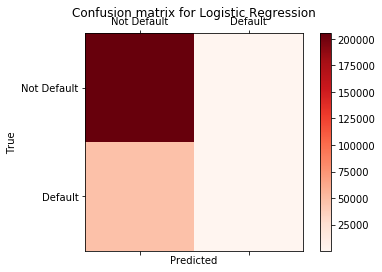

KNN
Accuracy is: 0.784
precision is: 0.296
recall is: 0.106


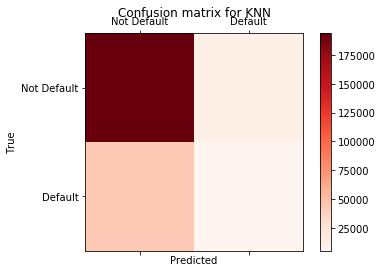

Random Forest
Accuracy is: 0.803
precision is: 0.385
recall is: 0.073


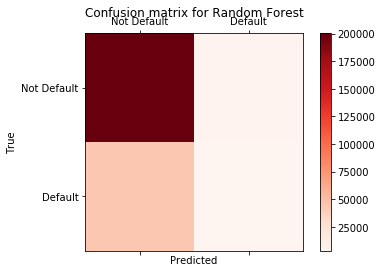

In [101]:
%matplotlib inline
classifier_logistic.fit(X_train, y_train)
pred_log = classifier_logistic.predict(X_test)

classifier_KNN.fit(X_train, y_train)
pred_knn = classifier_KNN.predict(X_test)

classifier_RF.fit(X_train, y_train)
pred_rf = classifier_RF.predict(X_test)

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,pred_log)),
    ("KNN", confusion_matrix(y_test,pred_knn)),
    ("Random Forest", confusion_matrix(y_test,pred_rf)),
]
#confusion_matrices
draw_confusion_matrices(confusion_matrices)

In [ ]:
from sklearn.metrics import f1_score
f1score = [
    ("Logistic Regression", f1_score(y_test,pred_log)),
    ("KNN", f1_score(y_test,pred_knn)),
    ("Random Forest", f1_score(y_test,pred_rf)),
]
f1score

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

Logistic Regression
Accuracy is: 0.811
precision is: 0.497
recall is: 0.009


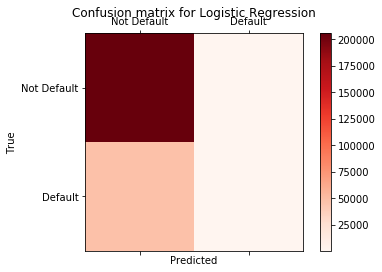

KNN
Accuracy is: 0.785
precision is: 0.300
recall is: 0.107


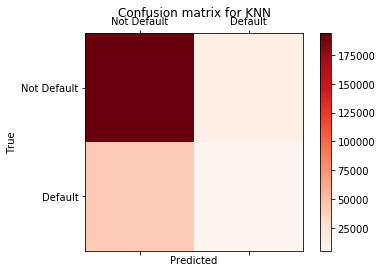

Random Forest
Accuracy is: 0.804
precision is: 0.389
recall is: 0.069


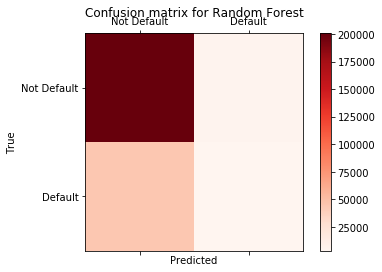

In [103]:
%matplotlib inline
classifier_logistic.fit(X_train, y_train)
pred_log = classifier_logistic.predict(X_test)

classifier_KNN.fit(X_train, y_train)
pred_knn = classifier_KNN.predict(X_test)

classifier_RF.fit(X_train, y_train)
pred_rf = classifier_RF.predict(X_test)

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,pred_log)),
    ("KNN", confusion_matrix(y_test,pred_knn)),
    ("Random Forest", confusion_matrix(y_test,pred_rf)),
]
#confusion_matrices
draw_confusion_matrices(confusion_matrices)

In [104]:
from sklearn.metrics import f1_score
f1score = [
    ("Logistic Regression", f1_score(y_test,pred_log)),
    ("KNN", f1_score(y_test,pred_knn)),
    ("Random Forest", f1_score(y_test,pred_rf)),
]
f1score

[('Logistic Regression', 0.01718326070870673),
 ('KNN', 0.15766751981251348),
 ('Random Forest', 0.11727715209436172)]

In [106]:
cm = confusion_matrix(y_test,pred_log)

In [107]:
cm

array([[205382,    423],
       [ 47393,    418]])

In [108]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

In [109]:
accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
precision = tp / (tp + fp + 0.0)
recall = tp / (tp + fn + 0.0)

In [110]:
accuracy,precision,recall

(0.8114629991798624, 0.49702734839476814, 0.008742757942732843)